Učitavanje potrebnih biblioteka

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
import matplotlib.patches as mpatches 

### Određivanje funkcija gustina verovatnoća bimodalnih raspodela

Definisanje parametara dvodimenzionalnih bimodalnih klasa

In [7]:
p11, p12 = 0.2, 0.8                                             # verovatnoce prve i druge raspodele za prvu klasu
M11, M12 = [[4], [4]], [[3], [9]]                               # srednje vrednosti prve i druge raspodele za prvu klasu - očekivanja
S11, S12 = [[0.5, 0.25], [0.25, 0.5]], [[0.8, 0.2], [0.2, 0.8]] # kovarijacione matrice prve i druge raspodele za prvu klasu

In [8]:
p21, p22 = 0.3, 0.7                                             # verovatnoce prve i druge raspodele za drugu klasu
M21, M22 = [[-5], [1]], [[-1], [1]]                             # srednje vrednosti prve i druge raspodele za drugu klasu - očekivanja
S21, S22 = [[0.5, 0.4], [0.4, 0.8]], [[0.3, -0.1], [-0.1, 0.3]] # kovarijacione matrice prve i druge raspodele za drugu klasu

Formiranje x i y ose prostora u kojima će biti analizirane date bimodalne raspodele - njihove funkcije gustine verovatnoće (FGV)

In [9]:
x_1 = np.linspace(-7, 12, 100)          # x koordinate za prvu klasu
y_1 = np.linspace(-2, 18, 100)          # y koordinate za prvu klasu

x_2 = np.linspace(-12, 7, 100)          # x koordinate za drugu klasu
y_2 = np.linspace(-7, 10, 100)          # y koordinate za drugu klasu

om1 = np.zeros((len(x_1), len(y_1)))    # matrica verovatnoca za prvu klasu
om2 = np.zeros((len(x_2), len(y_2)))    # matrica verovatnoca za drugu klasu

Određivanje FGV bimodalnih raspodela

In [10]:
# prolazak kroz sve tacke prostora i racunanje fgv za svaku
for i in range(len(x_1)):
    for j in range(len(y_1)):

        X = [[x_1[i]], [y_1[j]]]        # vektor sa x i y koordinatom tacke iz prve klase
        # racunanje fgv za prvu rapodelu prve bimodalne raspodele
        f11 = 1/(2*np.pi*np.sqrt(np.linalg.det(S11)))*np.exp(-0.5*np.transpose(np.subtract(X, M11)) @ np.linalg.inv(S11) @ np.subtract(X, M11))
        # racunanje fgv za drugu rapodelu prve bimodalne raspodele
        f12 = 1/(2*np.pi*np.sqrt(np.linalg.det(S12)))*np.exp(-0.5*np.transpose(np.subtract(X, M12)) @ np.linalg.inv(S12) @ np.subtract(X, M12))
        
        om1[i, j] = p11*f11 + p12*f12   # racunanje fgv za prvu klasu

        X = [[x_2[i]], [y_2[j]]]        # vektor sa x i y koordinatom tacke iz druge klase
        # racunanje fgv za prvu rapodelu druge bimodalne raspodele
        f21 = 1/(2*np.pi*np.sqrt(np.linalg.det(S21)))*np.exp(-0.5*np.transpose(np.subtract(X, M21)) @ np.linalg.inv(S21) @ np.subtract(X, M21))
        # racunanje fgv za drugu rapodelu druge bimodalne raspodele
        f22 = 1/(2*np.pi*np.sqrt(np.linalg.det(S22)))*np.exp(-0.5*np.transpose(np.subtract(X, M22)) @ np.linalg.inv(S22) @ np.subtract(X, M22))
        om2[i, j] = p21*f21 + p22*f22   # racunanje fgv za drugu klasu

#normalizacija
om1 = om1/np.sum(om1)
om2 = om2/np.sum(om2)

In [11]:
# formiranje grida za prikaz
x_1, y_1 = np.meshgrid(x_1, y_1)
x_2, y_2 = np.meshgrid(x_2, y_2)

Prikaz funkcija gustina verovatnoca za obe klase

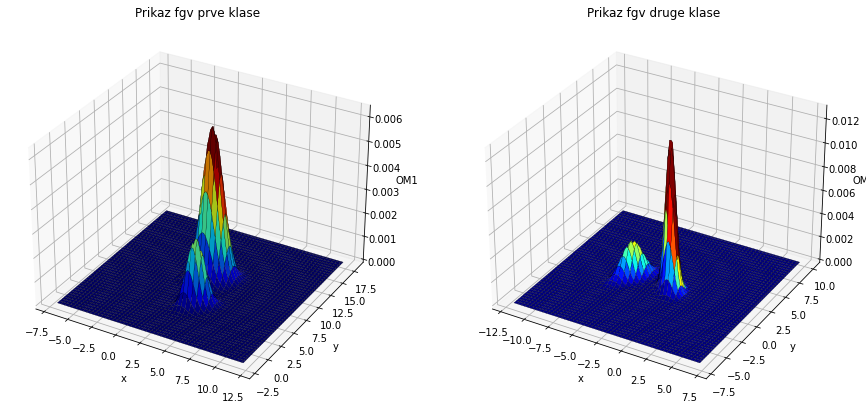

In [13]:
# formiranje boja za prikaz
my_col_1 = plt.cm.jet(om1.T*200)
my_col_2 = plt.cm.jet(om2.T*200)

# prikaz fgv-ova
fig, ax = plt.subplots(1, 2,
                       figsize=(15, 8),
                       layout='tight',
                       subplot_kw=dict(projection="3d"))
ax[0].plot_surface(x_1, y_1, om1.T, facecolors=my_col_1, ec='black', lw=0.2, shade=True)
ax[1].plot_surface(x_2, y_2, om2.T, facecolors=my_col_2, ec='black', lw=0.2, shade=False)

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('OM1') 

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('OM2')

ax[0].set_title('Prikaz fgv prve klase')
ax[1].set_title('Prikaz fgv druge klase')

plt.show()

### a) Generisanje odbiraka transformacijom bojenja i njihov prikaz

Prvo je potrebno odrediti sopstvene vrednosti i spostvene vektore

In [14]:
[F11, L11] = np.linalg.eig(S11) #sopstvene vrednosti i sopstveni vektori kovarijacione matrice prve raspodele prve klase
[F12, L12] = np.linalg.eig(S12) #sopstvene vrednosti i sopstveni vektori kovarijacione matrice druge raspodele prve klase
[F21, L21] = np.linalg.eig(S21) #sopstvene vrednosti i sopstveni vektori kovarijacione matrice prve raspodele druge klase
[F22, L22] = np.linalg.eig(S22) #sopstvene vrednosti i sopstveni vektori kovarijacione matrice druge raspodele druge klase

Određivanje transformacionih matrica

In [15]:
T11 = F11*(np.sign(L11)*abs(L11)**(1/2))    #matrica transformacije za odbirke prve rapodele prve klase
T12 = F12*(np.sign(L12)*abs(L12)**(1/2))    #matrica transformacije za odbirke druge rapodele prve klase
T21 = F21*(np.sign(L21)*abs(L21)**(1/2))    #matrica transformacije za odbirke prve rapodele druge klase
T22 = F22*(np.sign(L22)*abs(L22)**(1/2))    #matrica transformacije za odabirke druge rapodele druge klase

Generisanje po 500 odbiraka iz dveju dvodimenzionalnih bimodalnih klasa

In [16]:
N = 500                             #broj odbiraka                     
odbirci_klasa_1 = np.zeros((2, N))  #matrica odbiraka za prvu klasu
odbirci_klasa_2 = np.zeros((2, N))  #matrica odbiraka za drugu klasu

for i in range(N):                  #generisanje odbiraka prve klase
    pom = random.random()
    if pom < p11:                   #odredjivanje kojoj raspodeli prve klase odbirak pripada
        odbirci_klasa_1[:, i] = (T11 @ np.random.randn(2, 1) + M11).T
    else:
        odbirci_klasa_1[:, i] = (T12 @ np.random.randn(2, 1) + M12).T

for i in range(N):                  #generisanje odbiraka druge klase
    pom = random.random()
    if pom < p21:                   #odredjivanje kojoj raspodeli druge klase odbirak pripada
        odbirci_klasa_2[:, i] = (T21 @ np.random.randn(2, 1) + M21).T
    else:
        odbirci_klasa_2[:, i] = (T22 @ np.random.randn(2, 1) + M22).T

Prikaz generisanih odbiraka i FGVa za dve dvodimenzionalne bimodalne klase

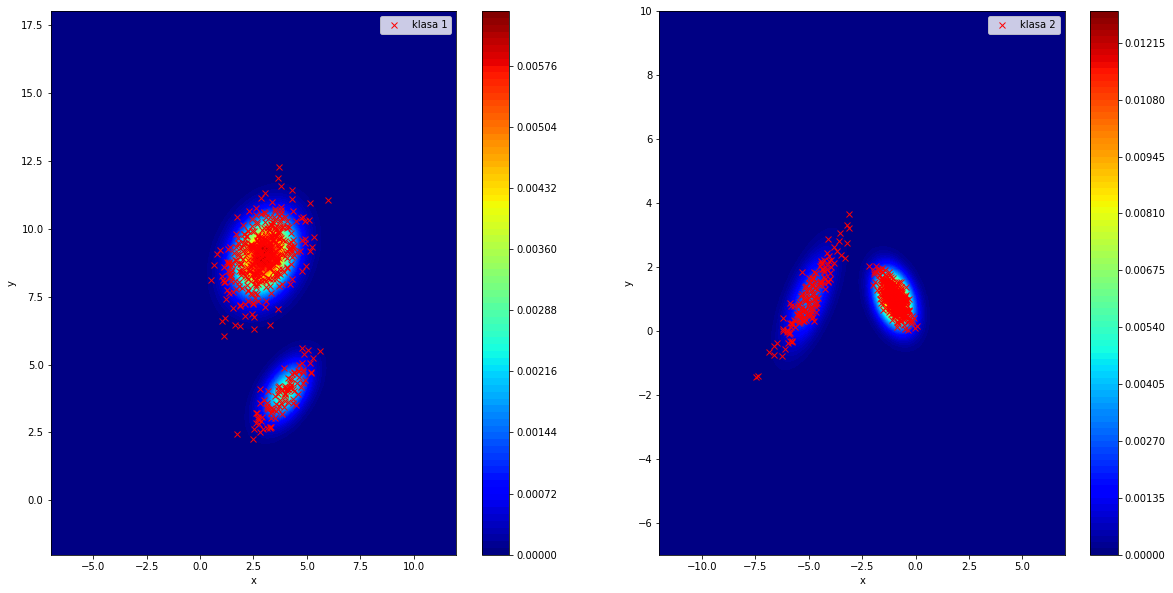

In [17]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.contourf(x_1, y_1, om1.T, 100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(odbirci_klasa_1[0, :], odbirci_klasa_1[1, :], 'x', label='klasa 1', color = 'red')
plt.legend()

plt.subplot(1, 2, 2)
plt.contourf(x_2, y_2, om2.T, 100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(odbirci_klasa_2[0, :], odbirci_klasa_2[1, :], 'x', label='klasa 2', color='red')
plt.legend()

plt.show()

Prikaz generisanih odbiraka na istom grafiku

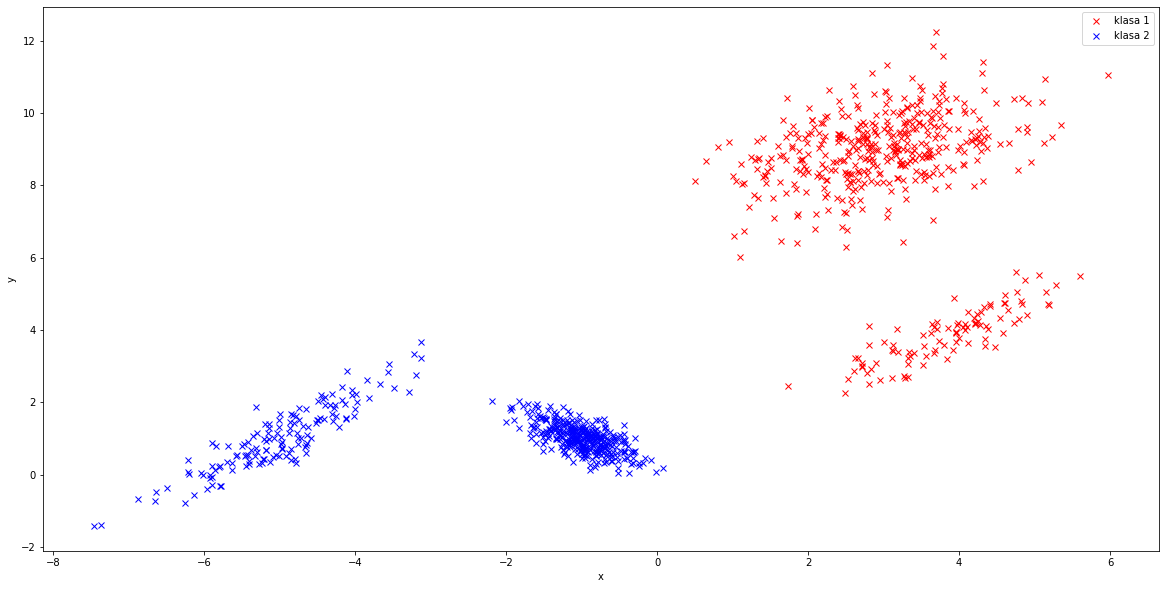

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(odbirci_klasa_1[0, :], odbirci_klasa_1[1, :], 'x', label='klasa 1', color = 'red')
plt.plot(odbirci_klasa_2[0, :], odbirci_klasa_2[1, :], 'x', label='klasa 2', color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Na grafiku iznad, prikazano je generisanih 1000 odbiraka dveju dvodimenzionalnih bimodalnih klasa (500 po klasi).

### b) Poređenje teorijskih FGVa za raspodele klasa i histograma generisanih odbiraka

Poređenje teorijske FGV i histograma generisanih odbiraka prve klase.

Text(0.5, 0.92, 'Prikaz fgv prve klase')

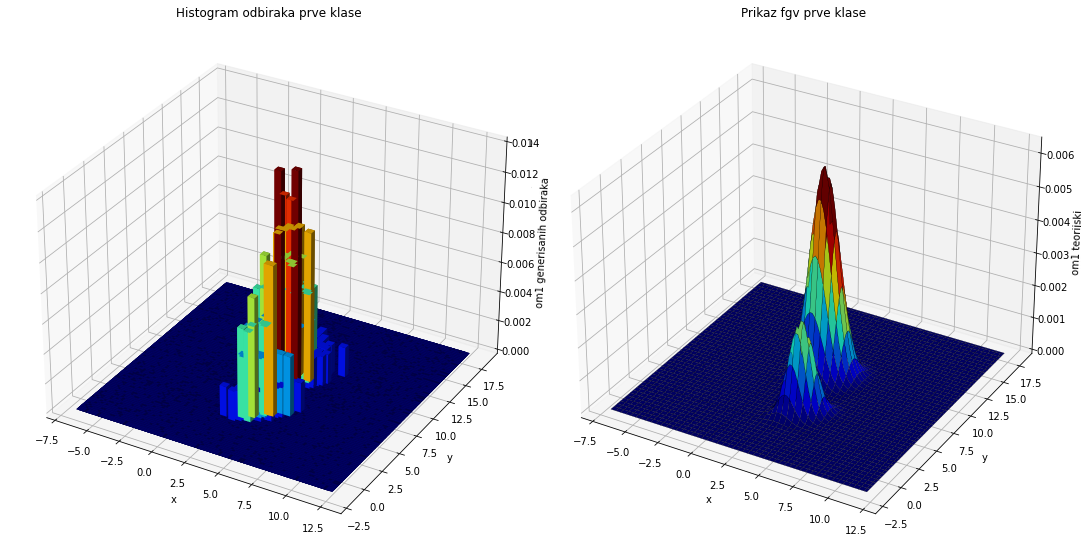

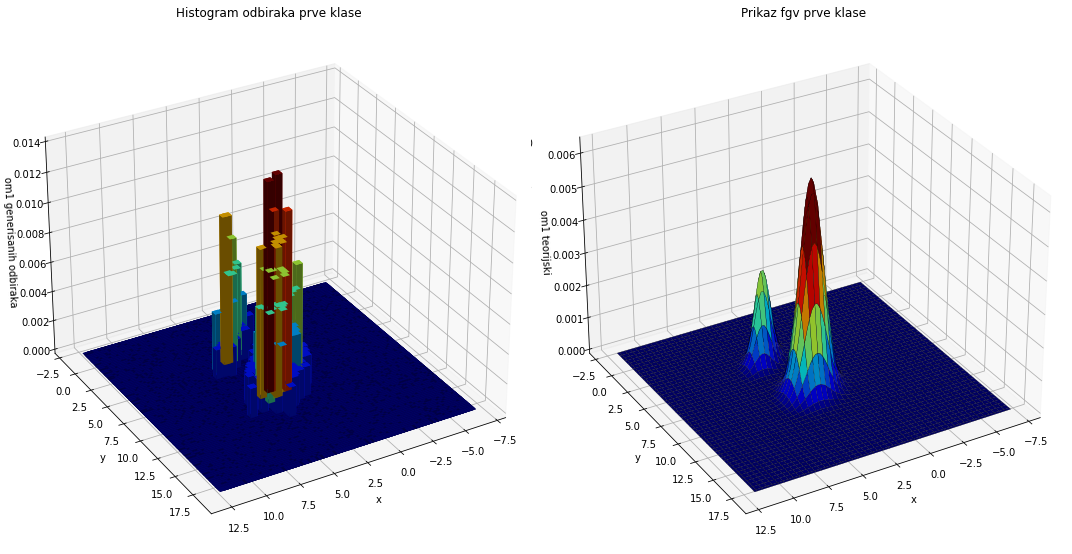

In [19]:
# prikaz iz prvog ugla
fig, ax = plt.subplots(1, 2,
                       figsize=(15, 8),
                       layout='tight',
                       subplot_kw=dict(projection="3d"))
ax[0] = fig.add_subplot(1, 2, 1, projection='3d')
hist, xedges, yedges = np.histogram2d(odbirci_klasa_1[0, :], odbirci_klasa_1[1, :], bins=100, range=[[-7, 12], [-2, 18]])
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()
dz = dz / np.sum(dz)
ax[0].bar3d(xpos, ypos, zpos, dx, dy, dz, color=plt.cm.jet(dz / dz.max()), zsort='average')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('om1 generisanih odbiraka')
ax[0].set_title('Histogram odbiraka prve klase')
ax[1].plot_surface(x_1, y_1, om1.T, facecolors=my_col_1, ec='black', lw=0.2, shade=True)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('om1 teorijski')
ax[1].set_title('Prikaz fgv prve klase')


# prikaz iz drugog ugla
fig, ax = plt.subplots(1, 2,
                          figsize=(15, 8),
                          layout='tight',
                          subplot_kw=dict(projection="3d"))
ax[0] = fig.add_subplot(1, 2, 1, projection='3d')
ax[0].view_init(30, 60)
ax[0].bar3d(xpos, ypos, zpos, dx, dy, dz, color=plt.cm.jet(dz / dz.max()), zsort='average')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('om1 generisanih odbiraka')
ax[0].set_title('Histogram odbiraka prve klase')
ax[1].plot_surface(x_1, y_1, om1.T, facecolors=my_col_1, ec='black', lw=0.2, shade=True)
ax[1].view_init(30, 60)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('om1 teorijski')
ax[1].set_title('Prikaz fgv prve klase')

Poređenje teorijske FGV i histograma generisanih odbiraka druge klase.

Text(0.5, 0.92, 'Prikaz fgv druge klase')

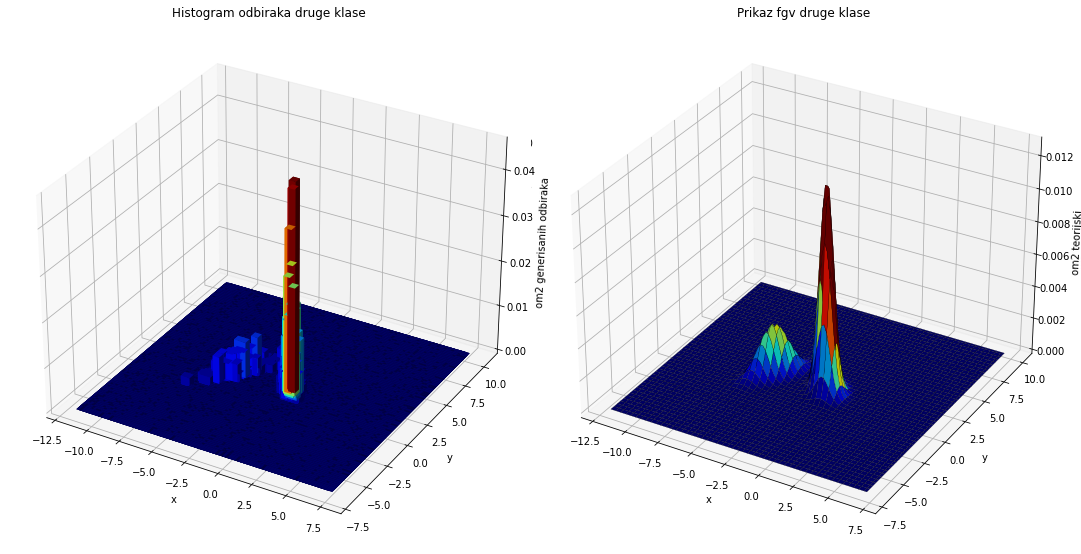

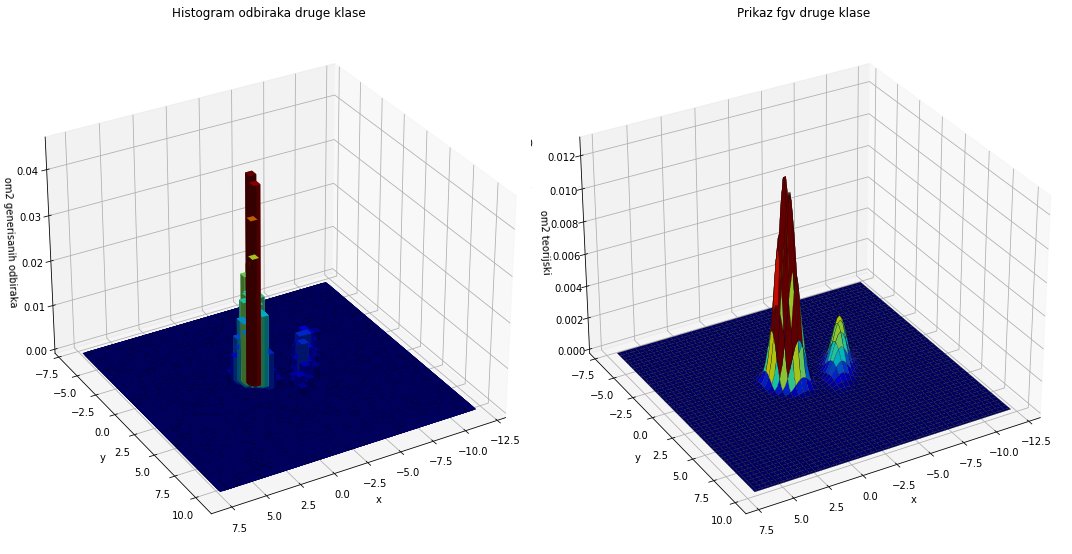

In [20]:
# prikaz iz prvog ugla
fig, ax = plt.subplots(1, 2,
                       figsize=(15, 8),
                       layout='tight',
                       subplot_kw=dict(projection="3d"))
ax[0] = fig.add_subplot(1, 2, 1, projection='3d')
hist, xedges, yedges = np.histogram2d(odbirci_klasa_2[0, :], odbirci_klasa_2[1, :], bins=100, range=[[-12, 7], [-7, 10]])
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()
dz = dz / np.sum(dz)
ax[0].bar3d(xpos, ypos, zpos, dx, dy, dz, color=plt.cm.jet(dz / dz.max()), zsort='average')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('om2 generisanih odbiraka')
ax[0].set_title('Histogram odbiraka druge klase')
ax[1].plot_surface(x_2, y_2, om2.T, facecolors=my_col_2, ec='black', lw=0.2, shade=True)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('om2 teorijski')
ax[1].set_title('Prikaz fgv druge klase')

# prikaz iz drugog ugla
fig, ax = plt.subplots(1, 2,
                          figsize=(15, 8),
                          layout='tight',
                          subplot_kw=dict(projection="3d"))
ax[0] = fig.add_subplot(1, 2, 1, projection='3d')
ax[0].view_init(30, 60)
ax[0].bar3d(xpos, ypos, zpos, dx, dy, dz, color=plt.cm.jet(dz / dz.max()), zsort='average')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('om2 generisanih odbiraka')
ax[0].set_title('Histogram odbiraka druge klase')
ax[1].plot_surface(x_2, y_2, om2.T, facecolors=my_col_2, ec='black', lw=0.2, shade=True)
ax[1].view_init(30, 60)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('om2 teorijski')
ax[1].set_title('Prikaz fgv druge klase')

Na graficima iznad, prikazane su funkcije gustine verovatnoće za raspodele klasa, kao i histogrami generisanih odbiraka iz različitih uglova.     
Oblik teorijski dobijene FGV sličan je obliku histograma generisanih odbiraka, iz čega se može zaključiti da su oni pravilno generisani.

### c) Bajesov klasifikator minimalne greške

In [21]:
odbirci = np.concatenate((odbirci_klasa_1, odbirci_klasa_2), axis=1)    # svi odbirci
labele = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis=1)    # labele za sve odbirke

In [22]:
def bajesov_klasifikator_min_verovatnoce(odbirci, labele, p11, p12, M11, M12, S11, S12):
    """Odredjivanje diskriminacione funkcije"""
    x = np.linspace(-11, 11, 100)   # x koordinate grida
    y = np.linspace(-4, 15, 100)    # y koordinate grida

    om1 = np.zeros((len(x), len(y)))    # fgv za prvu klasu
    om2 = np.zeros((len(x), len(y)))    # fgv za drugu klasu

    for i in range(len(x)):
        for j in range(len(y)):
            X = [[x[i]], [y[j]]]
            f11 = 1/(2*np.pi*np.sqrt(np.linalg.det(S11)))*np.exp(-0.5*np.transpose(np.subtract(X, M11)) @ np.linalg.inv(S11) @ np.subtract(X, M11))
            f12 = 1/(2*np.pi*np.sqrt(np.linalg.det(S12)))*np.exp(-0.5*np.transpose(np.subtract(X, M12)) @ np.linalg.inv(S12) @ np.subtract(X, M12))
            om1[i, j] = p11*f11 + p12*f12

            X = [[x[i]], [y[j]]]
            f21 = 1/(2*np.pi*np.sqrt(np.linalg.det(S21)))*np.exp(-0.5*np.transpose(np.subtract(X, M21)) @ np.linalg.inv(S21) @ np.subtract(X, M21))
            f22 = 1/(2*np.pi*np.sqrt(np.linalg.det(S22)))*np.exp(-0.5*np.transpose(np.subtract(X, M22)) @ np.linalg.inv(S22) @ np.subtract(X, M22))
            om2[i, j] = p21*f21 + p22*f22

    h = -np.log(om1/om2)   # diskriminaciona funkcija

    """Klasifikacija odbiraka"""
    predvidjene_labele = np.zeros((1, len(odbirci[0, :])))  # predikcija labela 

    for i in range(len(odbirci[0, :])):
        X = [[odbirci[0, i]], [odbirci[1, i]]]
        f11 = 1/(2*np.pi*np.sqrt(np.linalg.det(S11)))*np.exp(-0.5*np.transpose(np.subtract(X, M11)) @ np.linalg.inv(S11) @ np.subtract(X, M11))
        f12 = 1/(2*np.pi*np.sqrt(np.linalg.det(S12)))*np.exp(-0.5*np.transpose(np.subtract(X, M12)) @ np.linalg.inv(S12) @ np.subtract(X, M12))
        om1 = p11*f11 + p12*f12

        X = [[odbirci[0, i]], [odbirci[1, i]]]
        f21 = 1/(2*np.pi*np.sqrt(np.linalg.det(S21)))*np.exp(-0.5*np.transpose(np.subtract(X, M21)) @ np.linalg.inv(S21) @ np.subtract(X, M21))
        f22 = 1/(2*np.pi*np.sqrt(np.linalg.det(S22)))*np.exp(-0.5*np.transpose(np.subtract(X, M22)) @ np.linalg.inv(S22) @ np.subtract(X, M22))
        om2 = p21*f21 + p22*f22

        if om1 > om2:   # klasifikacija
            predvidjene_labele[0, i] = 0
        else:
            predvidjene_labele[0, i] = 1

    tacnost = np.sum(predvidjene_labele == labele)/len(labele[0, :])    # tacnost klasifikacije
    # tacnost klasifikacije za svaku klasu
    tacnost_1 = np.sum(predvidjene_labele[0, labele[0, :] == 0] == labele[0, labele[0, :] == 0])/len(labele[0, labele[0, :] == 0])
    tacnost_2 = np.sum(predvidjene_labele[0, labele[0, :] == 1] == labele[0, labele[0, :] == 1])/len(labele[0, labele[0, :] == 1])

    return h, tacnost, tacnost_1, tacnost_2

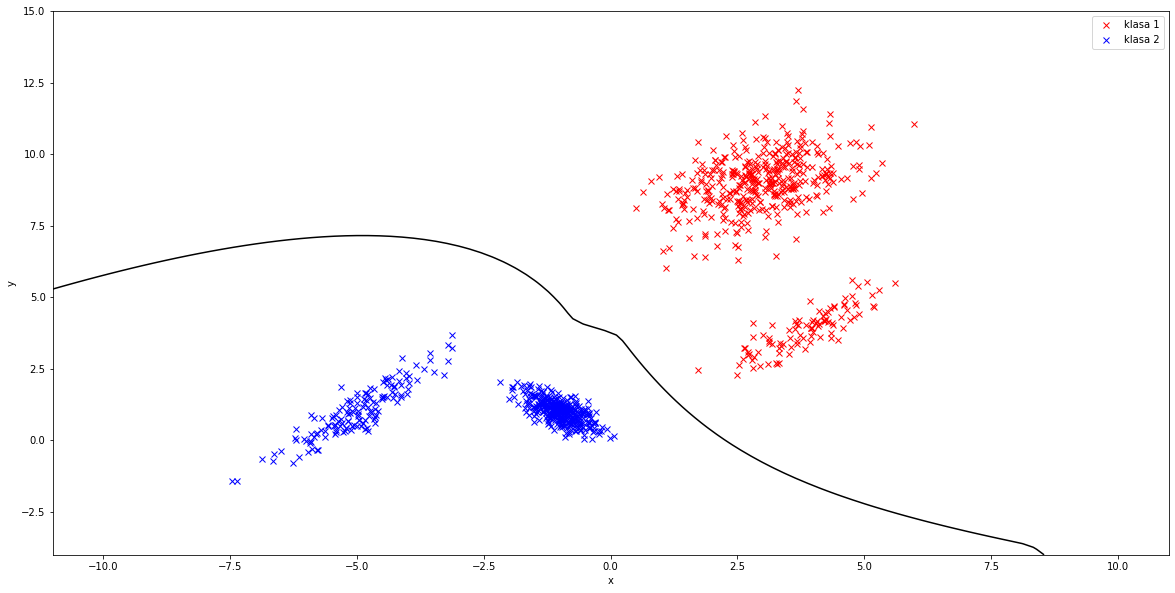

Ukupna tacnost klasifikacije:  1.0
Tacnost klasifikacije za prvu klasu:  1.0
Tacnost klasifikacije za drugu klasu:  1.0


In [23]:
h, ukupna_tacnost, tacnost_klasa1, tacnost_klasa2 = bajesov_klasifikator_min_verovatnoce(odbirci, labele, p11, p12, M11, M12, S11, S12)

# prikaz odbiraka i projektovane klassifikacione linije
x = np.linspace(-11, 11, 100)
y = np.linspace(-4, 15, 100)

plt.figure(figsize=(20, 10))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(odbirci_klasa_1[0, :], odbirci_klasa_1[1, :], 'x', label='klasa 1', color = 'red')
plt.plot(odbirci_klasa_2[0, :], odbirci_klasa_2[1, :], 'x', label='klasa 2', color='blue')
plt.legend()
plt.contour(x, y, h.T, 0, colors='black')
plt.show()

print('Ukupna tacnost klasifikacije: ', ukupna_tacnost)
print('Tacnost klasifikacije za prvu klasu: ', tacnost_klasa1)
print('Tacnost klasifikacije za drugu klasu: ', tacnost_klasa2)

Implementirana funkcija Bajesovog klasifikatora ovako generisane odbirke klasifikuje bez greške. Oni su i okom potpuno separabini, tako da je ovaj rezultat očekivan.           

Teorijske greše klasifikacije mogu se dobiti posmatranjem vrednosti FGV jedne klase za odbirke koje pripadaju drugoj. Konkretno, sumiranjem vrednosti fgv svih odbiraka koji su detektovani kao oni iz prve klase a pripadaju drugoj, dobija se greška prvog reda. Ekvivalentno tome, nalazi se i greška drugog reda.

In [24]:
x = np.linspace(-11, 11, 100)   # x koordinate grida
y = np.linspace(-4, 15, 100)    # y koordinate grida

om1 = np.zeros((len(x), len(y)))    # fgv za prvu klasu
om2 = np.zeros((len(x), len(y)))    # fgv za drugu klasu

f_1 = np.zeros((len(x), len(y)))    # fgv za prvu rapodelu prve bimodalne raspodele
# prvo je potrebno formirati fgv za svaku tacku grida (iste dimenzije grida i za om1 i za om2)
# i pronaci gresku klasifikacije
for i in range(len(x)):
    for j in range(len(y)):
        X = [[x[i]], [y[j]]]
        f11 = 1/(2*np.pi*np.sqrt(np.linalg.det(S11)))*np.exp(-0.5*np.transpose(np.subtract(X, M11)) @ np.linalg.inv(S11) @ np.subtract(X, M11))
        f12 = 1/(2*np.pi*np.sqrt(np.linalg.det(S12)))*np.exp(-0.5*np.transpose(np.subtract(X, M12)) @ np.linalg.inv(S12) @ np.subtract(X, M12))
        f_1[i, j] = p11*f11 + p12*f12
        om1[i, j] = p11*f11 + p12*f12

        X = [[x[i]], [y[j]]]
        f21 = 1/(2*np.pi*np.sqrt(np.linalg.det(S21)))*np.exp(-0.5*np.transpose(np.subtract(X, M21)) @ np.linalg.inv(S21) @ np.subtract(X, M21))
        f22 = 1/(2*np.pi*np.sqrt(np.linalg.det(S22)))*np.exp(-0.5*np.transpose(np.subtract(X, M22)) @ np.linalg.inv(S22) @ np.subtract(X, M22))
        om2[i, j] = p21*f21 + p22*f22

om1 = om1/np.sum(om1)   
om2 = om2/np.sum(om2)   

greska_klasifikacije_1 = np.sum(om1[om1 < om2])
greska_klasifikacije_2 = np.sum(om2[om2 < om1])
print('Greska klasifikacije za prvu klasu: ', greska_klasifikacije_1)
print('Greska klasifikacije za drugu klasu: ', greska_klasifikacije_2)

Greska klasifikacije za prvu klasu:  1.4610560736779398e-06
Greska klasifikacije za drugu klasu:  9.530764640750415e-07


Teorijske greške prvog i drugog reda su malo veće od nule jer vrednosti fgv jedne klase u oblasti druge nisu jednake 0, već i dalje postoji mala verovatnoća da se tu pojavi odbirak koji ipak pripada pogrešnoj klasi.   

### d) Projektovanje klasifikatora minimalne cene tako da se više penalizuje poglešna klasifikacija odbiraka iz prve klase

Klasifikator minimalne cene se koristi kada nam je bitno da odbirke neke klase uvek dobro detektujemo. U ovom slučaju, penalizuje se više pogrešna detekcija odbirka koji prirada prvoj klasi - potrebno je povećati vrednost C12. Cene C11 i C22 se uglavnom postavljaju na 0, jer uvek želimo da se klasa dobro detektuje. 

In [27]:
def bajesov_klasifikator_cene(odbirci, labele, p11, p12, M11, M12, S11, S12, c11, c12, c21, c22):
    # definisanje x i y koordinata grida
    x = np.linspace(-11, 11, 100)
    y = np.linspace(-4, 15, 100)

    # definisanje fgv za obe klase
    om1 = np.zeros((len(x), len(y)))
    om2 = np.zeros((len(x), len(y)))

    for i in range(len(x)):
        for j in range(len(y)):
            X = [[x[i]], [y[j]]]
            f11 = 1/(2*np.pi*np.sqrt(np.linalg.det(S11)))*np.exp(-0.5*np.transpose(np.subtract(X, M11)) @ np.linalg.inv(S11) @ np.subtract(X, M11))
            f12 = 1/(2*np.pi*np.sqrt(np.linalg.det(S12)))*np.exp(-0.5*np.transpose(np.subtract(X, M12)) @ np.linalg.inv(S12) @ np.subtract(X, M12))
            om1[i, j] = p11*f11 + p12*f12

            X = [[x[i]], [y[j]]]
            f21 = 1/(2*np.pi*np.sqrt(np.linalg.det(S21)))*np.exp(-0.5*np.transpose(np.subtract(X, M21)) @ np.linalg.inv(S21) @ np.subtract(X, M21))
            f22 = 1/(2*np.pi*np.sqrt(np.linalg.det(S22)))*np.exp(-0.5*np.transpose(np.subtract(X, M22)) @ np.linalg.inv(S22) @ np.subtract(X, M22))
            om2[i, j] = p21*f21 + p22*f22

    # odredjivanje diskriminacione funkcije
    h = -np.log(om1/om2)
    # odredjivanje parametra C - pomeraj diskriminacione funkcije
    C = -np.log((c22-c12)/(c11-c21))

    # prikaz diskriminacione funkcije i klasifikacione linije
    plt.figure(figsize=(20, 10))
    plt.plot(odbirci[0, labele[0, :] == 0], odbirci[1, labele[0, :] == 0], 'x', label='klasa 1', color = 'red')
    plt.plot(odbirci[0, labele[0, :] == 1], odbirci[1, labele[0, :] == 1], 'x', label='klasa 2', color='blue')
    plt.contour(x, y, h.T, 0, colors='black', linestyles='dashed')
    h = h + C   # pomeranje diskriminacione funkcije
    plt.contour(x, y, h.T, 0, colors= 'red')
    plt.legend()
    plt.show()

    # klasifikacija odbiraka i racunanje tacnosti
    predvidjene_labele = np.zeros((1, len(odbirci[0, :]))) 

    for i in range(len(odbirci[0, :])):
        X = [[odbirci[0, i]], [odbirci[1, i]]]
        f11 = 1/(2*np.pi*np.sqrt(np.linalg.det(S11)))*np.exp(-0.5*np.transpose(np.subtract(X, M11)) @ np.linalg.inv(S11) @ np.subtract(X, M11))
        f12 = 1/(2*np.pi*np.sqrt(np.linalg.det(S12)))*np.exp(-0.5*np.transpose(np.subtract(X, M12)) @ np.linalg.inv(S12) @ np.subtract(X, M12))
        om1 = p11*f11 + p12*f12

        X = [[odbirci[0, i]], [odbirci[1, i]]]
        f21 = 1/(2*np.pi*np.sqrt(np.linalg.det(S21)))*np.exp(-0.5*np.transpose(np.subtract(X, M21)) @ np.linalg.inv(S21) @ np.subtract(X, M21))
        f22 = 1/(2*np.pi*np.sqrt(np.linalg.det(S22)))*np.exp(-0.5*np.transpose(np.subtract(X, M22)) @ np.linalg.inv(S22) @ np.subtract(X, M22))
        om2 = p21*f21 + p22*f22

        h = -np.log(om1/om2)    # diskriminaciona funkcija
        if h < C:               # klasifikacija
            predvidjene_labele[0, i] = 0
        else:
            predvidjene_labele[0, i] = 1

    tacnost = np.sum(predvidjene_labele == labele)/len(labele[0, :])    # tacnost klasifikacije
    # tacnost klasifikacije za svaku klasu
    tacnost_1 = np.sum(predvidjene_labele[0, labele[0, :] == 0] == labele[0, labele[0, :] == 0])/len(labele[0, labele[0, :] == 0])
    tacnost_2 = np.sum(predvidjene_labele[0, labele[0, :] == 1] == labele[0, labele[0, :] == 1])/len(labele[0, labele[0, :] == 1])

    return tacnost, tacnost_1, tacnost_2  

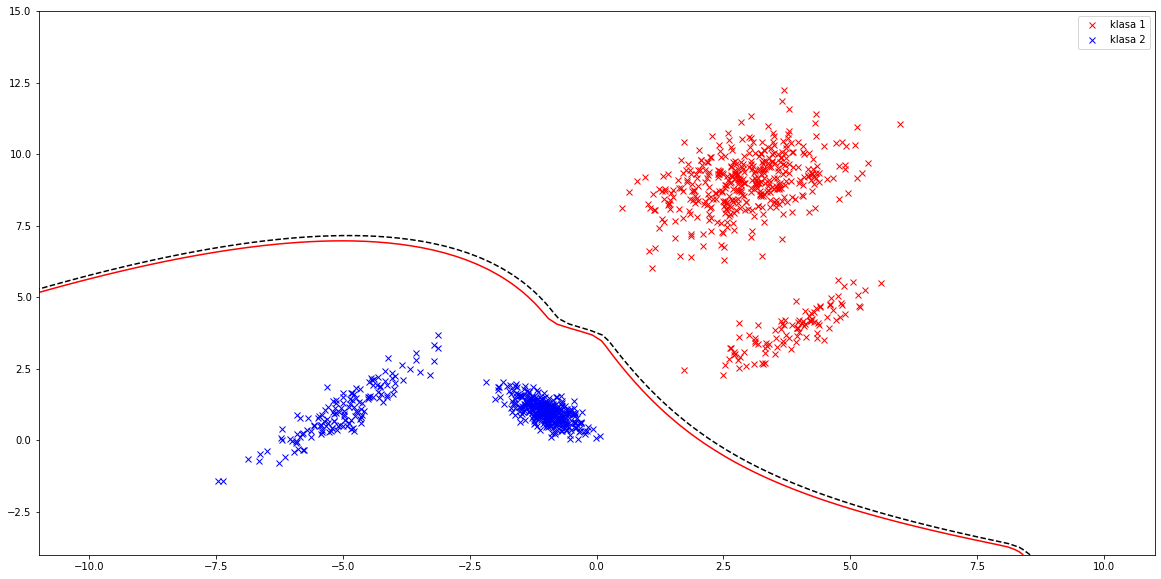

(1.0, 1.0, 1.0)

In [28]:
tac, tac1, tac2 = bajesov_klasifikator_cene(odbirci, labele, p11, p12, M11, M12, S11, S12, 0, 10, 1, 0)
tac, tac1, tac2

(Diskusija vezana za eksperimentalne rezultate i greške)      
Isprekidana crna linija predstavlja prvobitni položaj klasifikacione linije, dok crvena linija predstavlja rezultat nakon uključivanja cena. Ovim postupkom se povećava mogućnost pojave odbirka koji će pripadati klasi 2, a biće detektovan kao klasa 1, ali se kao što je i traženo, povećava verovatnoća tačne klasifikacije svih odbiraka prve klase. Ovakav sistem može biti koristan kada nam je tačna klasifikacija odbiraka jedne klase značajno bitnija od ukupne (ili klasifikacije druge klase).

### e) Projektovanje Neuman-Pearsonovog klasifikatora sa izborom $e_2 = e_0$

Neuman-Pearsonov klasifikator bazira se na prvobitnom fiksiranju jedne od grešaka i kasnijoj minimizaciji druge.     
Klasifikaciona linija ponovo je pomerena za prag koji ovog puta zavisi on početno usvojene greške. Na grafiku ispod prikazana je data zavisnost, radi lakšeg izbora početnog parametra.

In [29]:
x = np.linspace(-11, 11, 100)  # x koordinate grida
y = np.linspace(-4, 15, 100)   # y koordinate grida
dx = x[1] - x[0]               # korak po x osi
dy = y[1] - y[0]               # korak po y osi

om1 = np.zeros((len(x), len(y)))    # inicijalizacija fgv za prvu klasu
om2 = np.zeros((len(x), len(y)))    # inicijalizacija fgv za drugu klasu

In [30]:
for i in range(len(x)):
    for j in range(len(y)):
        X = [[x[i]], [y[j]]]
        f11 = 1/(2*np.pi*np.sqrt(np.linalg.det(S11)))*np.exp(-0.5*np.transpose(np.subtract(X, M11)) @ np.linalg.inv(S11) @ np.subtract(X, M11))
        f12 = 1/(2*np.pi*np.sqrt(np.linalg.det(S12)))*np.exp(-0.5*np.transpose(np.subtract(X, M12)) @ np.linalg.inv(S12) @ np.subtract(X, M12))
        om1[i, j] = p11*f11 + p12*f12

        X = [[x[i]], [y[j]]]
        f21 = 1/(2*np.pi*np.sqrt(np.linalg.det(S21)))*np.exp(-0.5*np.transpose(np.subtract(X, M21)) @ np.linalg.inv(S21) @ np.subtract(X, M21))
        f22 = 1/(2*np.pi*np.sqrt(np.linalg.det(S22)))*np.exp(-0.5*np.transpose(np.subtract(X, M22)) @ np.linalg.inv(S22) @ np.subtract(X, M22))
        om2[i, j] = p21*f21 + p22*f22

# diskriminaciona funkcija
h = -np.log(om1/om2)

In [31]:
epsilon = np.zeros(10000)             # inicijalizacija niza za e0 - gresku klasifikacije 
mi = np.linspace(0, 10-0.001, 10000)  # inicijalizacija niza za mi - prag diskriminacione funkcije

print(len(mi), len(epsilon))

10000 10000


Prolazak kroz sve vrednosti pomeraja diskriminacione funkcije i računanje greške klasifikacije.

In [ ]:
# prolazak kroz sve vrednosti pomeraja diskriminacione funkcije
# i racunanje greske klasifikacije za svaku vrednost na gridu
cns = 1000
for mi_i in mi:
    for i in range(99):
        for j in range(99):
            if h[i, j] < -np.log(mi_i):
                epsilon[int(mi_i*cns)] += dx*dy*((om2[i,j] + om2[i+1,j] + om2[i,j+1] + om2[i+1,j+1])/4);

Prikaz funkcije zavisnosti greške $\epsilon_0$ od pomeraja diskriminacione funkcije $mi$.

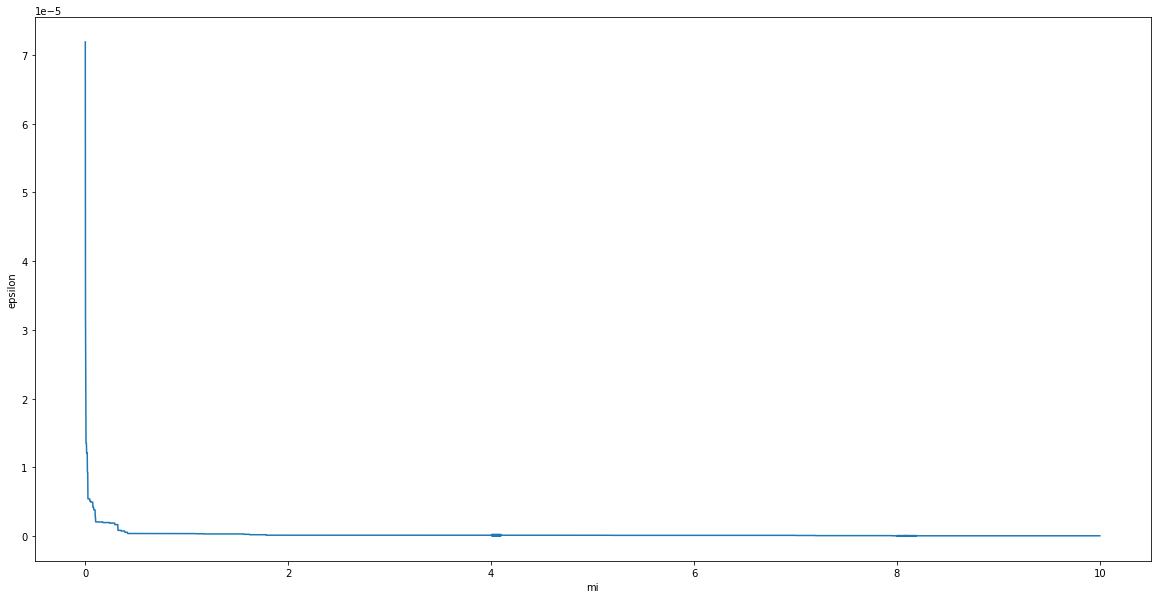

In [129]:
plt.figure(figsize=(20, 10))
plt.plot(mi[1:], epsilon[1:])
plt.xlabel('mi')
plt.ylabel('epsilon')
plt.show()

Vidi se da greška $\epsilon_0$ jako brzo kreće da stagnira. Već od vrednosti mi=2, pad greške postaje zanemarljiv - tako da se baš može izabrati data vrednost.

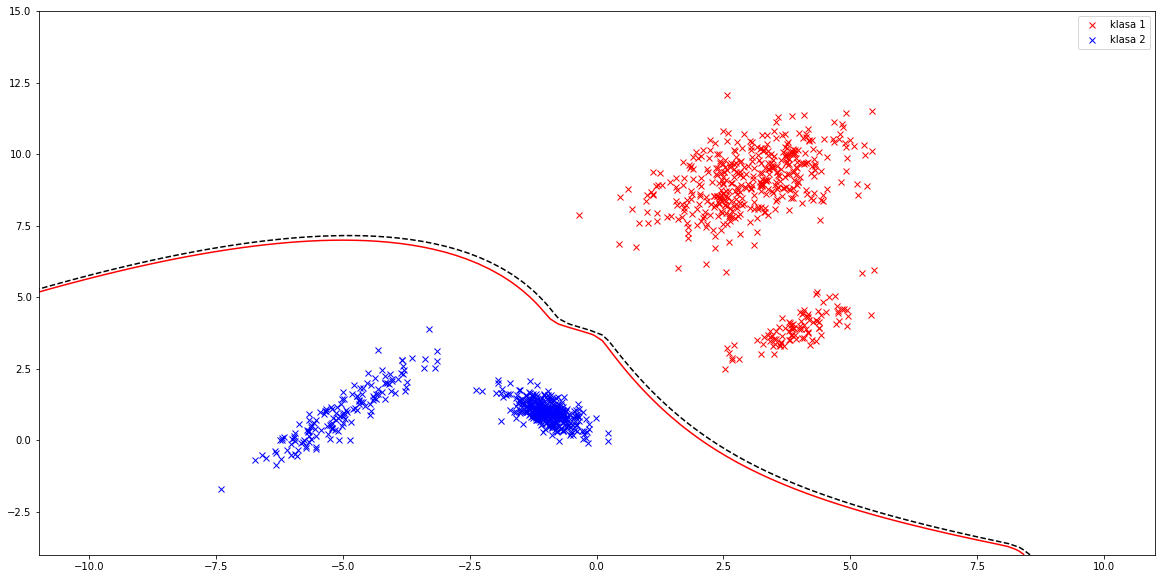

In [131]:
# Neyman Pearson
mi = 2

plt.figure(figsize=(20, 10))
plt.plot(odbirci[0, labele[0, :] == 0], odbirci[1, labele[0, :] == 0], 'x', label='klasa 1', color = 'red')
plt.plot(odbirci[0, labele[0, :] == 1], odbirci[1, labele[0, :] == 1], 'x', label='klasa 2', color='blue')
plt.contour(x, y, h.T - mi, 0, colors='red')
plt.contour(x, y, h.T, 0, colors='black', linestyles='dashed')
plt.legend()
plt.show()

Na grafiku iznad prikazana je klasifikaciona linija projektovana Neuman-Pearsonovim klasifikatorom.

### f) Waldov sekvencijalni test 

Waldov test, jedan je od sekvencijalnih testova gde dolaskom novog odbirka može doći do donošenja odluke. Greške prvog i drugog reda su fiksirane, a granice za donošenje odluke određene su pomoću njih. Svaki novi odbirak koji dolazi, ima uticaj na vrednost diskriminacione funkcije; a kada ona pređe određenu donju ili gornju granicu, dolazi do donošenja odluke.

In [280]:
def valdov_sekvencijalni_test(odbirci, labele, a, b, p11, p12, M11, M12, S11, S12):
    X1 = odbirci[:, labele[0, :] == 0]  # odbirci prve klase
    X2 = odbirci[:, labele[0, :] == 1]  # odbirci druge klase
    
    X1 = np.random.permutation(X1.T).T  # permutacija odbiraka prve klase
    X2 = np.random.permutation(X2.T).T  # permutacija odbiraka druge klase

    Sm_1, Sm_2 = 0, 0                   # vrednosti diskriminacionih funkcija za klasu 1 i 2
    pom_1, pom_2 = [[0,0]], [[0,0]]     # nizovi za cuvanje vrednosti diskriminacionih funkcija   

    for i in range(1, 500):
        X = [[X1[0, i]], [X1[1, i]]]
        f11 = 1/(2*np.pi*np.sqrt(np.linalg.det(S11)))*np.exp(-0.5*np.transpose(np.subtract(X, M11)) @ np.linalg.inv(S11) @ np.subtract(X, M11))
        f12 = 1/(2*np.pi*np.sqrt(np.linalg.det(S12)))*np.exp(-0.5*np.transpose(np.subtract(X, M12)) @ np.linalg.inv(S12) @ np.subtract(X, M12))
        om1 = p11*f11 + p12*f12
        f21 = 1/(2*np.pi*np.sqrt(np.linalg.det(S21)))*np.exp(-0.5*np.transpose(np.subtract(X, M21)) @ np.linalg.inv(S21) @ np.subtract(X, M21))
        f22 = 1/(2*np.pi*np.sqrt(np.linalg.det(S22)))*np.exp(-0.5*np.transpose(np.subtract(X, M22)) @ np.linalg.inv(S22) @ np.subtract(X, M22))
        om2 = p21*f21 + p22*f22

        Sm_1 = Sm_1 - np.log(om1/om2)   # nova vrednost diskriminacione funkcije za klasu 1
        pom_1.append([i, Sm_1[0, 0]])   # dodavanje nove vrednosti diskriminacione funkcije u niz za klasu 1

        if Sm_1 <= a or Sm_1 >= b:      # provera da li je vrednost diskriminacione funkcije van granica
            break                       # ako jeste, prekidamo petlju

    # prikaz promene vrednosti diskriminacione funkcije za klasu 1
    Sm_x = [pom_1[i][0] for i in range(len(pom_1))]
    Sm_y = [pom_1[i][1] for i in range(len(pom_1))]
    plt.plot(Sm_x, Sm_y, color='red')  
    odbirci_klasa_1 = len(Sm_x)

    for i in range(1, 500):
        X = [[X2[0, i]], [X2[1, i]]]
        f11 = 1/(2*np.pi*np.sqrt(np.linalg.det(S11)))*np.exp(-0.5*np.transpose(np.subtract(X, M11)) @ np.linalg.inv(S11) @ np.subtract(X, M11))
        f12 = 1/(2*np.pi*np.sqrt(np.linalg.det(S12)))*np.exp(-0.5*np.transpose(np.subtract(X, M12)) @ np.linalg.inv(S12) @ np.subtract(X, M12))
        om1 = p11*f11 + p12*f12
        f21 = 1/(2*np.pi*np.sqrt(np.linalg.det(S21)))*np.exp(-0.5*np.transpose(np.subtract(X, M21)) @ np.linalg.inv(S21) @ np.subtract(X, M21))
        f22 = 1/(2*np.pi*np.sqrt(np.linalg.det(S22)))*np.exp(-0.5*np.transpose(np.subtract(X, M22)) @ np.linalg.inv(S22) @ np.subtract(X, M22))
        om2 = p21*f21 + p22*f22

        Sm_2 = Sm_2 - np.log(om1/om2)   # nova vrednost diskriminacione funkcije za klasu 2
        pom_2.append([i, Sm_2[0, 0]])   # dodavanje nove vrednosti diskriminacione funkcije u niz za klasu 2

        if Sm_2 <= a or Sm_2 >= b:      # provera da li je vrednost diskriminacione funkcije van granica
            break                       # ako jeste, prekidamo petlju

    # prikaz promene vrednosti diskriminacione funkcije za klasu 2
    Sm_x = [pom_2[i][0] for i in range(len(pom_2))]
    Sm_y = [pom_2[i][1] for i in range(len(pom_2))]
    plt.plot(Sm_x, Sm_y, color='blue')  
    odbirci_klasa_2 = len(Sm_x)

    # odredjivanje maksimalne x ose
    max_len = max(odbirci_klasa_1, odbirci_klasa_2)

    # prikaz granica a i b
    plt.plot([0, max_len], [a, a], color='black')
    plt.plot([0, max_len], [b, b], color='black')  

    
    return max_len, odbirci_klasa_1, odbirci_klasa_2

In [299]:
# lista fiksnih gresaka
e1, e2 = 10e-100, 10e-20

# odredjivanje granica a i b za donosenje odluka
a, b = -np.log((1-e1)/e2), -np.log(e1/(1-e2))

Prikaz grafika odlučivanja za 100 pokretanja 

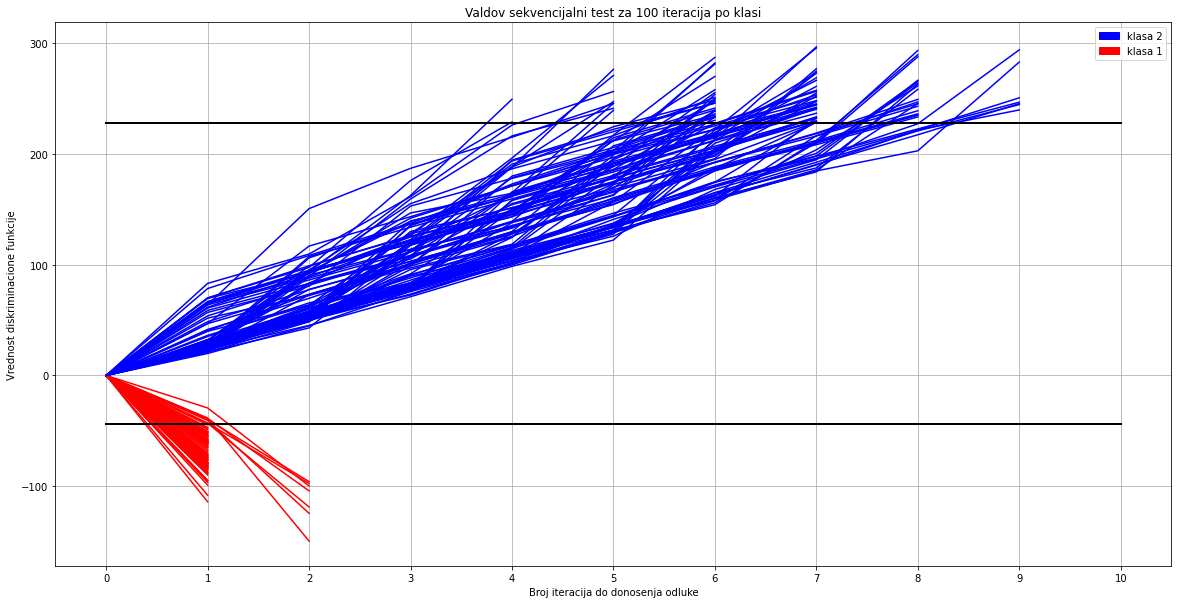

Srednja vrednost potrebnih odbiraka za donosenje odluke pripadnosti prvoj klasi:  2.07
Srednja vrednost potrebnih odbiraka za donosenje odluke pripadnosti drugoj klasi:  7.84


In [300]:
plt.figure(figsize=(20, 10))

max_len = 0                 # inicijalizacija maksimalne duzine (za kasniji prikaz granica a i b)
odb1_sr, odb2_sr = 0, 0     # inicijalizacija srednjih vrednosti odbiraka za obe klase  
for i in range(100):    
    x_len, odb1, odb2 = valdov_sekvencijalni_test(odbirci, labele, a, b, p11, p12, M11, M12, S11, S12)
    odb1_sr += odb1
    odb2_sr += odb2
    if x_len > max_len:
        max_len = x_len

odb1_sr /= 100          # srednja vrednost potrebnih odbiraka za prvu klasu
odb2_sr /= 100          # srednja vrednost potrebnih odbiraka za drugu klasu

# prikaz granica a i b  
plt.plot([0, max_len], [a, a], color='black')
plt.plot([0, max_len], [b, b], color='black')

# prikaz svih celiih brojeva na x osi
plt.xticks(range(0, max_len+1))

# prikaz legendi
blue_patch = mpatches.Patch(color='blue', label='klasa 2') 
red_patch = mpatches.Patch(color='red', label='klasa 1')
plt.legend(handles=[blue_patch, red_patch]) 
plt.title('Valdov sekvencijalni test za 100 iteracija po klasi')
plt.ylabel('Vrednost diskriminacione funkcije')
plt.xlabel('Broj iteracija do donosenja odluke')

# prikaz grida
plt.grid()
plt.show()

print('Srednja vrednost potrebnih odbiraka za donosenje odluke pripadnosti prvoj klasi: ', odb1_sr)
print('Srednja vrednost potrebnih odbiraka za donosenje odluke pripadnosti drugoj klasi: ', odb2_sr)

Na grafiku iznad, opaža se 100 različitih iteracija po klasi. Plave linije predstavljaju putanje do donošenja odluke da odbirci priradaju drugoj kasi, a crvene do donošenja odluke da odbirci priradaju prvoj klasi. U proseku je potrebno više odbiraka da bi došlo do odluke da sekvenca predstavlja klasu 2, nego klasu 1.    

Sada osmotrimo kako promena vrednosti grešaka utiče na donošenje odluke.

Prvo su prikazani grafici zavisnosti potrebnog broja odbiraka od greške e2:

In [312]:
# lista fiksnih gresaka
e = [[10e-100, 10e-100], [10e-100, 10e-90], [10e-100, 10e-80], [10e-100, 10e-70], [10e-100, 10e-60], [10e-100, 10e-50], [10e-100, 10e-40], [10e-100, 10e-30], [10e-100, 10e-20]]

In [323]:
odb1_sr_lista, odb2_sr_lista = [], []   # inicijalizacija nizova za srednje vrednosti odbiraka za obe klase
for e1, e2 in e:

    # odredjivanje granica a i b za donosenje odluka
    a, b = -np.log((1-e1)/e2), -np.log(e1/(1-e2))  

    max_len = 0                 # inicijalizacija maksimalne duzine (za kasniji prikaz granica a i b)
    odb1_sr, odb2_sr = 0, 0     # inicijalizacija srednjih vrednosti odbiraka za obe klase  
    for i in range(100):
        x_len, odb1, odb2 = valdov_sekvencijalni_test(odbirci, labele, a, b, p11, p12, M11, M12, S11, S12)
        odb1_sr += odb1
        odb2_sr += odb2
        if x_len > max_len:
            max_len = x_len
    
    odb1_sr_lista.append(odb1_sr / 100)
    odb2_sr_lista.append(odb2_sr / 100)

plt.close()

(0.0, 9.0)

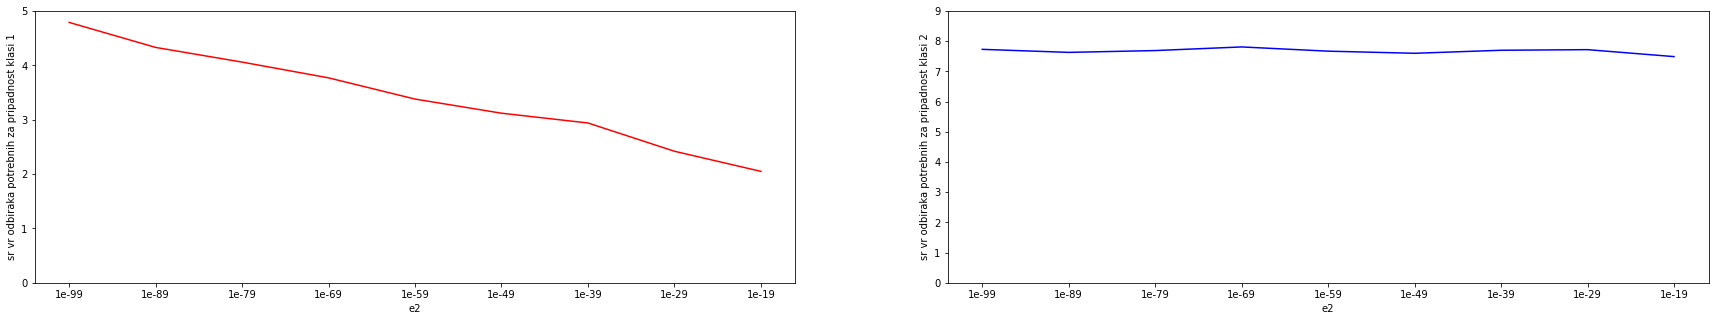

In [319]:
e_str = [str(e[i][1]) for i in range(len(e))]
plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
plt.plot(e_str, odb1_sr_lista, color='red')
plt.xlabel('e2')
plt.ylabel('sr vr odbiraka potrebnih za pripadnost klasi 1')
plt.ylim(0, 5)
plt.subplot(1, 2, 2)
plt.plot(e_str, odb2_sr_lista, color='blue')
plt.xlabel('e2')
plt.ylabel('sr vr odbiraka potrebnih za pripadnost klasi 2')
plt.ylim(0, 9)

Sa prikazanih grafika se uočava da povećanje prihvatljive greške za drugu klasu e2 dovodi do smanjenja broja odbiraka koji su potrebni prilikom proglašenja da sekvenca predstavlja prvu klasu i stagnacije za drugu klasu. 

Zatim su prikazani grafici zavisnosti potrebnog broja odbiraka od greške e1:

In [ ]:
odb1_sr_lista, odb2_sr_lista = [], []   # inicijalizacija nizova za srednje vrednosti odbiraka za obe klase
for e2, e1 in e:

    # odredjivanje granica a i b za donosenje odluka
    a, b = -np.log((1-e1)/e2), -np.log(e1/(1-e2))  

    max_len = 0                 # inicijalizacija maksimalne duzine (za kasniji prikaz granica a i b)
    odb1_sr, odb2_sr = 0, 0     # inicijalizacija srednjih vrednosti odbiraka za obe klase  
    for i in range(100):
        x_len, odb1, odb2 = valdov_sekvencijalni_test(odbirci, labele, a, b, p11, p12, M11, M12, S11, S12)
        odb1_sr += odb1
        odb2_sr += odb2
        if x_len > max_len:
            max_len = x_len
    
    odb1_sr_lista.append(odb1_sr / 100)
    odb2_sr_lista.append(odb2_sr / 100)

plt.close()

(0.0, 8.0)

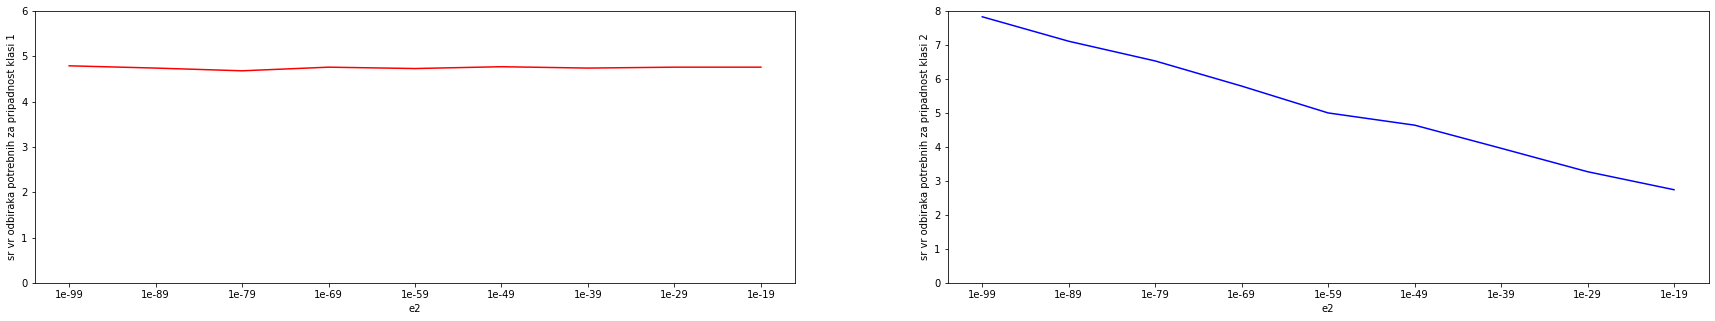

In [321]:
e_str = [str(e[i][1]) for i in range(len(e))]
plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
plt.plot(e_str, odb1_sr_lista, color='red')
plt.xlabel('e2')
plt.ylabel('sr vr odbiraka potrebnih za pripadnost klasi 1')
plt.ylim(0, 6)
plt.subplot(1, 2, 2)
plt.plot(e_str, odb2_sr_lista, color='blue')
plt.xlabel('e2')
plt.ylabel('sr vr odbiraka potrebnih za pripadnost klasi 2')
plt.ylim(0, 8)

Sa prikazanih grafika se uočava da povećanje prihvatljive greške za prvu klasu e1 dovodi do smanjenja broja odbiraka koji su potrebni prilikom proglašenja da sekvenca predstavlja drugu klasu i stagnacije za prvu klasu.    

Analizom oba slučaja, zaključuje se da povećanje obe greške smanjuje broj odbiraka potrebnih za donošenje odluke pripadnosti bilo kojoj klasi.